<a href="https://colab.research.google.com/github/aiakobson/Digital_technologies/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22DT2024_NB6_DQ_SQL%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To work with this notebook, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.

The following topics are addessed:
- simple profiling
- using SQL for quality assessment
- profiling reports
 *</font>



# 1. Loading data and starting SQLite


## 1.1 Connecting to our Database

In [4]:
# We will first load an sql extension into our environment
# This extension will allow us to work with sql on Colaboratory
#
%load_ext sql

# We will then connect to our in memory sqlite database
# NB: This database will cease to exist as soon as the database connection is closed.
# We will learn more about how databases are created later in prep.
#
%sql sqlite:///mydb.sqlite

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


## 1.2 Inserting values from a local file

In [5]:
# In this example, we will create a COURSE table for a student management system.
# This will be imported from a CSV file on a local csv file in the Files directory
# First, grab the file from https://www.dropbox.com/s/i4lqxvfa7oqgjpo/property.csv?dl=0
# and upload it in the folder Files
# Then fetch all records from property table.
#
# Load example table with Pandas
# Connect to local dabatase
import sqlite3
cnx = sqlite3.connect('mydb.sqlite')

import pandas as pd
df = pd.read_csv('property.csv', sep=',')

# Dump it to sqlite!
df.to_sql(name='PROPERTY', if_exists='replace', index=False, con=cnx)

# Bye bye
cnx.close()




In [6]:
%%sql
SELECT * From PROPERTY;

 * sqlite:///mydb.sqlite
Done.


ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
100001000,104.0,PUTNAM,Y,3,1,1000
100002000,197.0,LEXINGTON,N,3,1.5,--
100003000,None,LEXINGTON,N,None,1,850
100004000,201.0,BERKELEY,12,1,None,700
100005000,203.0,BERKELEY,Y,3,2,1600
100006000,207.0,BERKELEY,Y,None,1,800
100007000,None,WASHINGTON,None,2,HURLEY,950
100008000,213.0,TREMONT,Y,1,1,None
100009000,215.0,TREMONT,Y,na,2,1800
100010000,216.0,BERELEY,Y,1,3,10


In [7]:
## Write a query to extract distinct values for an attribute (eg NUM_BATH)
%%sql





 * sqlite:///mydb.sqlite


In [8]:
%%sql
PRAGMA  table_info(PROPERTY)

 * sqlite:///mydb.sqlite
Done.


cid,name,type,notnull,dflt_value,pk
0,ID,INTEGER,0,None,0
1,ST_NUM,REAL,0,None,0
2,ST_NAME,TEXT,0,None,0
3,OWN_OCCUPIED,TEXT,0,None,0
4,NUM_BEDROOMS,TEXT,0,None,0
5,NUM_BATH,TEXT,0,None,0
6,SQ_FT,TEXT,0,None,0


In [9]:
print(df)


           ID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0   100001000   104.0      PUTNAM            Y            3        1  1000
1   100002000   197.0   LEXINGTON            N            3      1.5    --
2   100003000     NaN   LEXINGTON            N          NaN        1   850
3   100004000   201.0    BERKELEY           12            1      NaN   700
4   100005000   203.0    BERKELEY            Y            3        2  1600
5   100006000   207.0    BERKELEY            Y          NaN        1   800
6   100007000     NaN  WASHINGTON          NaN            2   HURLEY   950
7   100008000   213.0     TREMONT            Y            1        1   NaN
8   100009000   215.0     TREMONT            Y           na        2  1800
9   100010000   216.0     BERELEY            Y            1        3    10
10  100011000    10.0    LEINGTON            N            2        1   800
11  100012000   213.0     TREMONT            Y            1        1   NaN


# 1.3 A first data analysis in Python of this dataframe


In [10]:
df.dtypes


ID                int64
ST_NUM          float64
ST_NAME          object
OWN_OCCUPIED     object
NUM_BEDROOMS     object
NUM_BATH         object
SQ_FT            object
dtype: object

In [11]:
df['ST_NAME']

0         PUTNAM
1      LEXINGTON
2      LEXINGTON
3       BERKELEY
4       BERKELEY
5       BERKELEY
6     WASHINGTON
7        TREMONT
8        TREMONT
9        BERELEY
10      LEINGTON
11       TREMONT
Name: ST_NAME, dtype: object

In [12]:
%%sql
PRAGMA table_info (property)

 * sqlite:///mydb.sqlite
Done.


cid,name,type,notnull,dflt_value,pk
0,ID,INTEGER,0,None,0
1,ST_NUM,REAL,0,None,0
2,ST_NAME,TEXT,0,None,0
3,OWN_OCCUPIED,TEXT,0,None,0
4,NUM_BEDROOMS,TEXT,0,None,0
5,NUM_BATH,TEXT,0,None,0
6,SQ_FT,TEXT,0,None,0


In [13]:
%%sql
SELECT * FROM property

 * sqlite:///mydb.sqlite
Done.


ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
100001000,104.0,PUTNAM,Y,3,1,1000
100002000,197.0,LEXINGTON,N,3,1.5,--
100003000,None,LEXINGTON,N,None,1,850
100004000,201.0,BERKELEY,12,1,None,700
100005000,203.0,BERKELEY,Y,3,2,1600
100006000,207.0,BERKELEY,Y,None,1,800
100007000,None,WASHINGTON,None,2,HURLEY,950
100008000,213.0,TREMONT,Y,1,1,None
100009000,215.0,TREMONT,Y,na,2,1800
100010000,216.0,BERELEY,Y,1,3,10


In [14]:
# We can have a first view in Python of this dataframe with "describe"

df.describe()


,ID,ST_NUM
count,1.200000e+01,10.000000
mean,1.000065e+08,177.900000
std,3.605551e+03,67.756836
min,1.000010e+08,10.000000
25%,1.000038e+08,198.000000
50%,1.000065e+08,205.000000
75%,1.000092e+08,213.000000
max,1.000120e+08,216.000000


# 1.4 Profiling data with sweetviz

In [15]:

!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 41.1 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


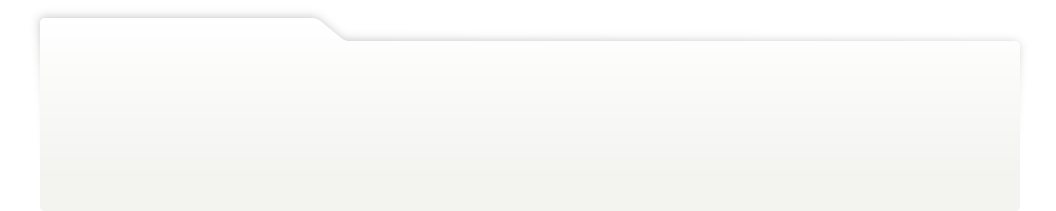
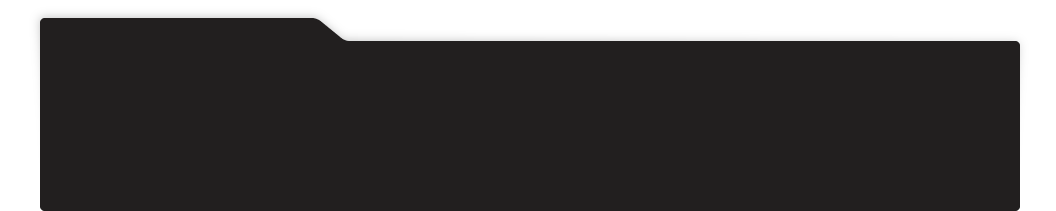
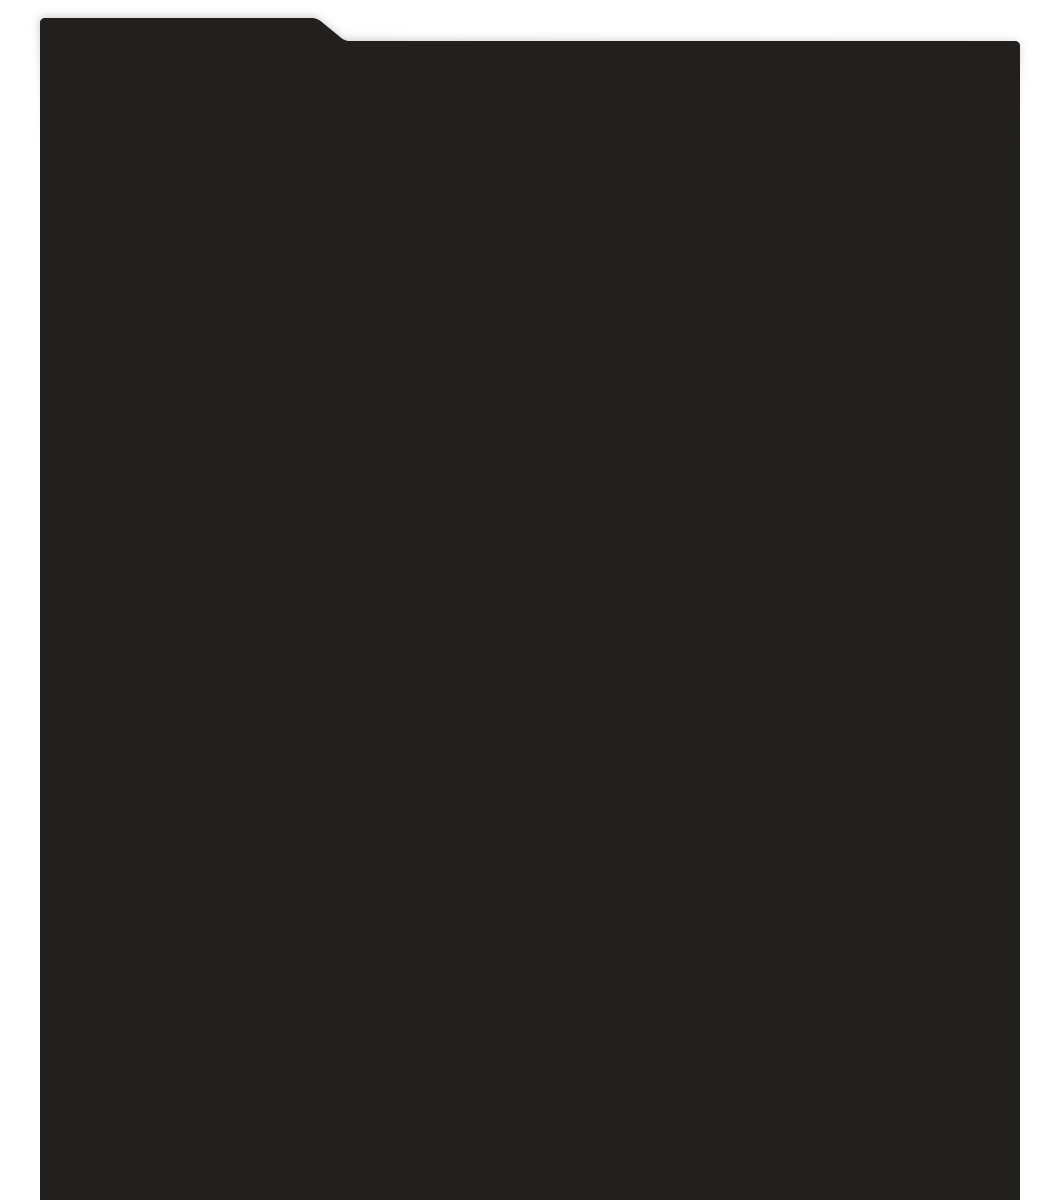
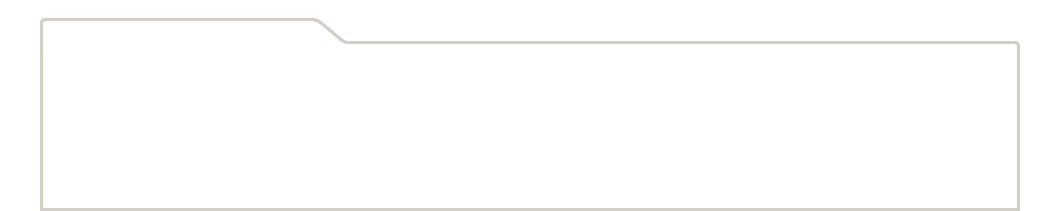
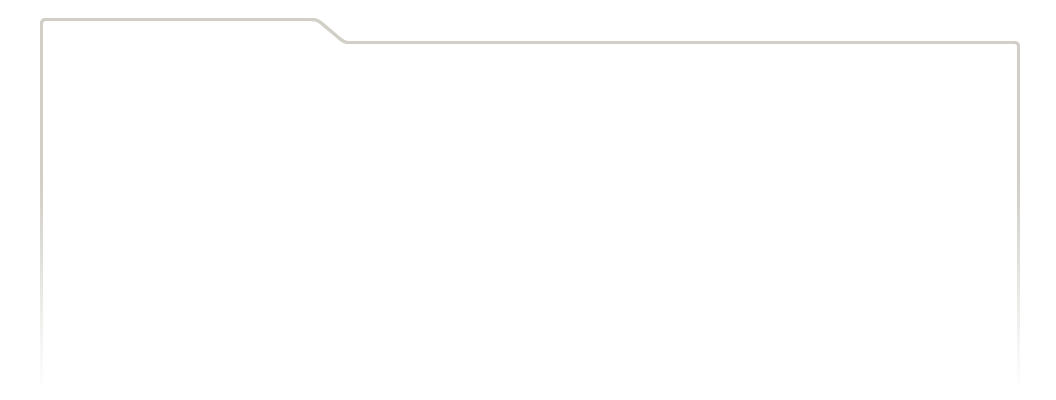
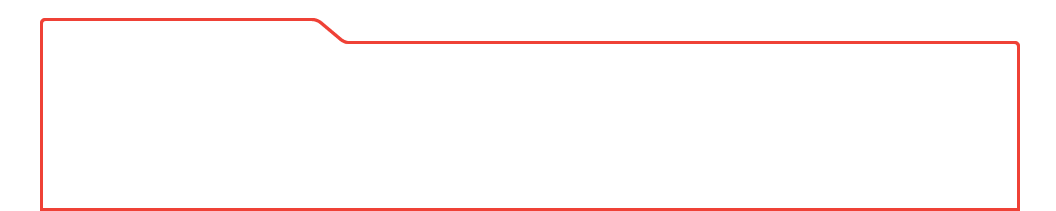
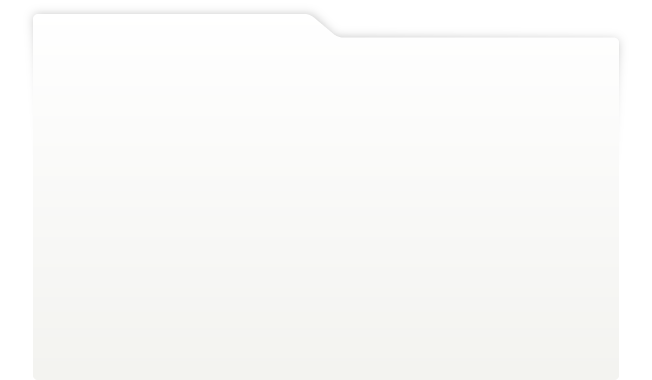
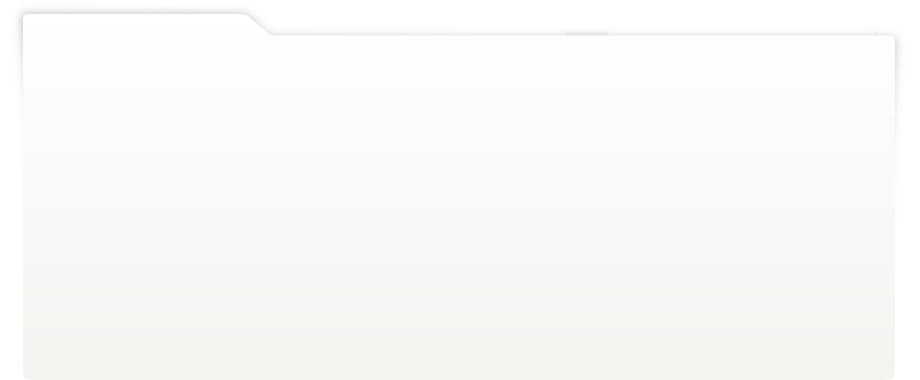
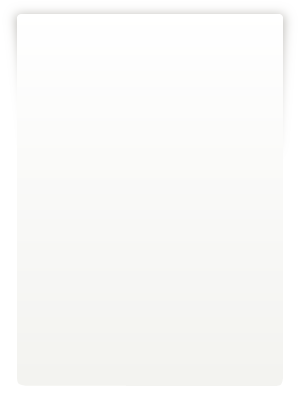
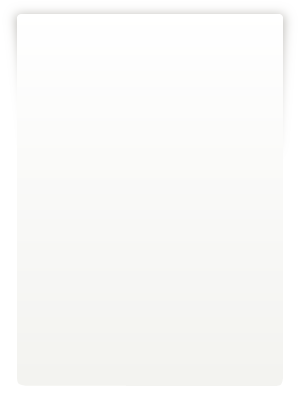
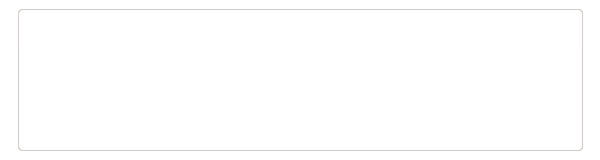
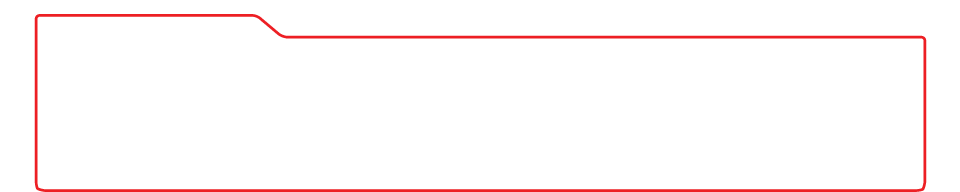
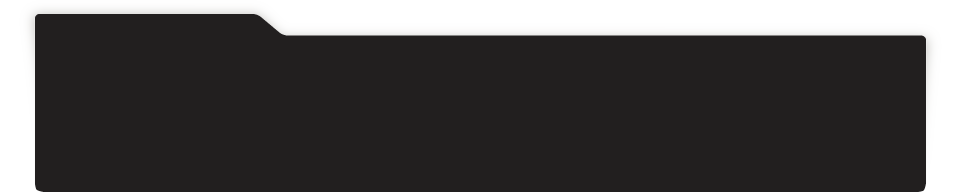
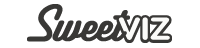
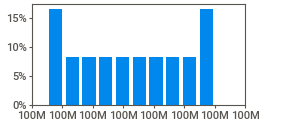
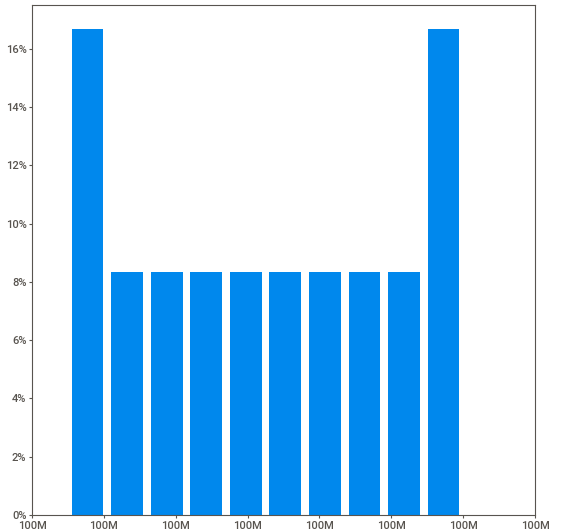
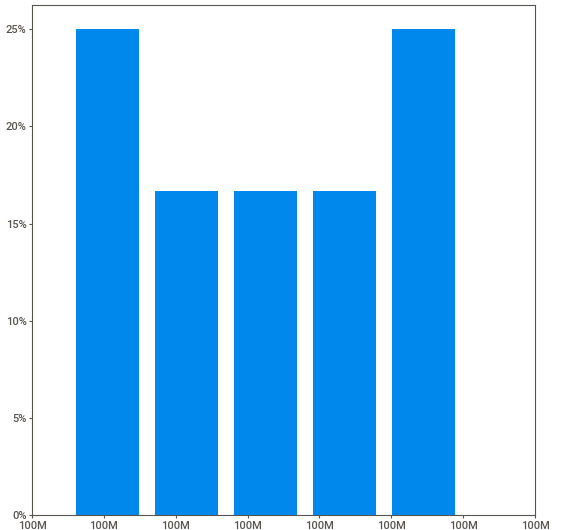
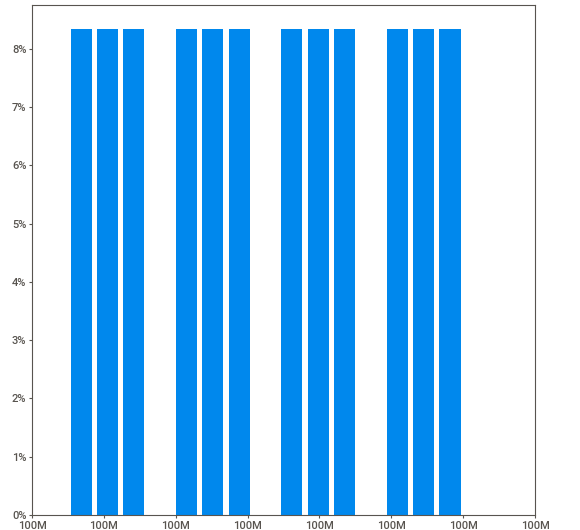
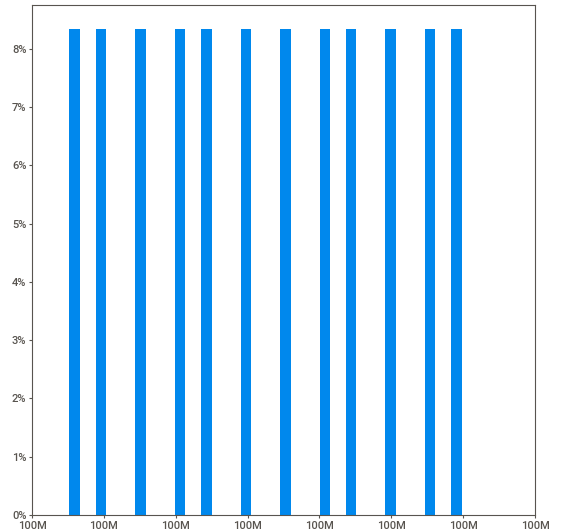
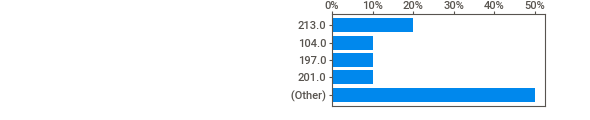
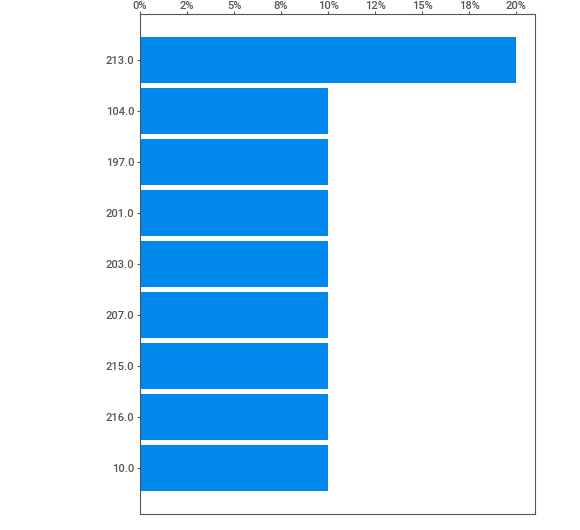
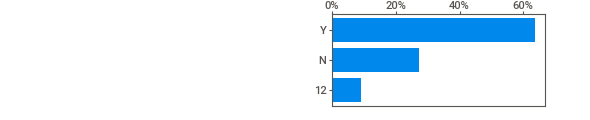
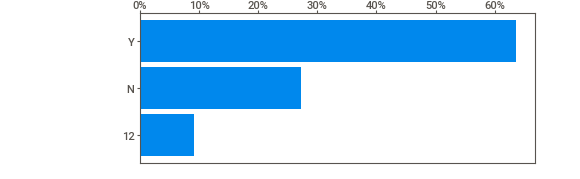
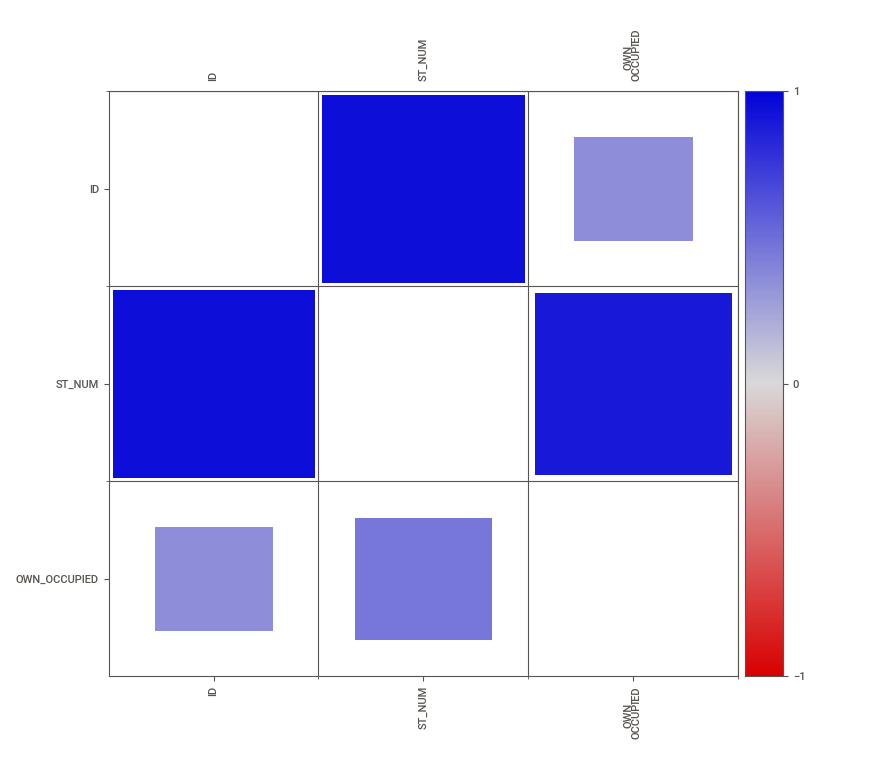
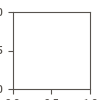

In [16]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_notebook()

## 1.4 Using SQL for profiling and cleaning


In [17]:

# In this example, we will try to identify quality problems in ST_NAME
#
%%sql
SELECT ST_NAME, COUNT(*)
FROM PROPERTY
GROUP BY ST_NAME;


 * sqlite:///mydb.sqlite
Done.


ST_NAME,COUNT(*)
BERELEY,1
BERKELEY,3
LEINGTON,1
LEXINGTON,2
PUTNAM,1
TREMONT,3
WASHINGTON,1


In [18]:
# Let's try to fix this - Is Berely maybe Berkeley? are there similar data?
%%sql
SELECT *
FROM PROPERTY
WHERE ST_NAME='BERELEY' OR ST_NAME='BERKELEY';


 * sqlite:///mydb.sqlite
Done.


ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
100004000,201.0,BERKELEY,12,1,None,700
100005000,203.0,BERKELEY,Y,3,2,1600
100006000,207.0,BERKELEY,Y,None,1,800
100010000,216.0,BERELEY,Y,1,3,10


In [19]:
# Discard BERELEY, clearly inconsistent
%%sql

DELETE
FROM PROPERTY
WHERE ST_NAME='BERELEY';

SELECT * FROM PROPERTY;


 * sqlite:///mydb.sqlite
1 rows affected.
Done.


ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
100001000,104.0,PUTNAM,Y,3,1,1000
100002000,197.0,LEXINGTON,N,3,1.5,--
100003000,None,LEXINGTON,N,None,1,850
100004000,201.0,BERKELEY,12,1,None,700
100005000,203.0,BERKELEY,Y,3,2,1600
100006000,207.0,BERKELEY,Y,None,1,800
100007000,None,WASHINGTON,None,2,HURLEY,950
100008000,213.0,TREMONT,Y,1,1,None
100009000,215.0,TREMONT,Y,na,2,1800
100011000,10.0,LEINGTON,N,2,1,800


In [20]:
# In this example, we will try to identify quality problems in OWN_OCCUPIED
#
%%sql
SELECT OWN_OCCUPIED, COUNT(*)
FROM PROPERTY
GROUP BY OWN_OCCUPIED;

 * sqlite:///mydb.sqlite
Done.


OWN_OCCUPIED,COUNT(*)
None,1
12,1
N,3
Y,6


In [21]:

# In this example, we will update the inconsistent value 12 to NULL
# First we show the tuple
%%sql
SELECT *
FROM PROPERTY
Where OWN_OCCUPIED='12';




 * sqlite:///mydb.sqlite
Done.


ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
100004000,201.0,BERKELEY,12,1,None,700


In [22]:
# Then update it
%%sql
UPDATE PROPERTY
SET OWN_OCCUPIED = NULL
WHERE ID=100004000;

SELECT * FROM PROPERTY;

 * sqlite:///mydb.sqlite
1 rows affected.
Done.


ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
100001000,104.0,PUTNAM,Y,3,1,1000
100002000,197.0,LEXINGTON,N,3,1.5,--
100003000,None,LEXINGTON,N,None,1,850
100004000,201.0,BERKELEY,None,1,None,700
100005000,203.0,BERKELEY,Y,3,2,1600
100006000,207.0,BERKELEY,Y,None,1,800
100007000,None,WASHINGTON,None,2,HURLEY,950
100008000,213.0,TREMONT,Y,1,1,None
100009000,215.0,TREMONT,Y,na,2,1800
100011000,10.0,LEINGTON,N,2,1,800


In [25]:
df['SQ_FT'][0]

'1000'

In [27]:
df['SQ_FT'] = pd.to_numeric(df['SQ_FT'], errors='coerce')

In [28]:
df['SQ_FT'].mean()


945.5555555555555

In [30]:
%%sql
SELECT min(SQ_FT)
FROM PROPERTY;

 * sqlite:///mydb.sqlite
Done.


min(SQ_FT)
--


## Challenge 1 -  Analyze NUM_BATH and fix it where possible

In [ ]:
# Hint: find the different values and corresponding inconsistent tuples
#
# remember to insert %%sql in the first line



## 1.5 SQL result set to a local variable and then to CSV

In [ ]:

# To export the result of a query to a local variable result_set

%%sql
result_set << SELECT * FROM PROPERTY;

 * sqlite:///mydb.sqlite
Done.
Returning data to local variable result_set


In [ ]:
result_set

ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
100001000,104.0,PUTNAM,Y,3,1,1000
100002000,197.0,LEXINGTON,N,3,1.5,--
100003000,None,LEXINGTON,N,None,1,850
100004000,201.0,BERKELEY,None,1,None,700
100005000,203.0,BERKELEY,Y,3,2,1600
100006000,207.0,BERKELEY,Y,None,1,800
100007000,None,WASHINGTON,None,2,HURLEY,950
100008000,213.0,TREMONT,Y,1,1,None
100009000,215.0,TREMONT,Y,na,2,1800
100011000,10.0,LEINGTON,N,2,1,800


In [ ]:

# And then to a CSV file (in local folders Files)
result_set.DataFrame().to_csv('export.csv', index=False)

!head export.csv


ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
100001000,104.0,PUTNAM,Y,3,1,1000
100002000,197.0,LEXINGTON,N,3,1.5,--
100003000,,LEXINGTON,N,,1,850
100004000,201.0,BERKELEY,,1,,700
100005000,203.0,BERKELEY,Y,3,2,1600
100006000,207.0,BERKELEY,Y,,1,800
100007000,,WASHINGTON,,2,HURLEY,950
100008000,213.0,TREMONT,Y,1,1,
100009000,215.0,TREMONT,Y,na,2,1800


# 1.6 Data from multiple sources

In [31]:
# import into tables STOCK1 and STOCK2 the csv files stock1.csv and stock2.csv
# The csv files are available at
# https://www.dropbox.com/s/djtylwzm4h5oer8/stock1.csv?dl=0
# https://www.dropbox.com/s/iy4zizkczca44bj/stock2.csv?dl=0

import sqlite3
cnx = sqlite3.connect('mydb.sqlite')

import pandas as pd
df = pd.read_csv('stock1.csv', sep=';')

# Dump it to sqlite!
df.to_sql(name='STOCK1', if_exists='replace', index=False, con=cnx)

df = pd.read_csv('stock2.csv', sep=';')

# Dump it to sqlite!
df.to_sql(name='STOCK2', if_exists='replace', index=False, con=cnx)


# Bye bye
cnx.close()



In [32]:
%%sql
SELECT * FROM STOCK1

 * sqlite:///mydb.sqlite
Done.


Date,Stock,Quote
07/03/21,ABC,15.0
04/03/21,ABC,15.1
03/03/21,ABC,15.9
02/03/21,ABC,16.0
07/03/21,ACME,80.0
04/03/21,ACME,9.0
03/03/21,ACME,9.2
02/03/21,ACME,9.5
07/03/21,SPRINT,8.2
04/03/21,SPRINT,9.0


In [33]:
%%sql
SELECT * FROM STOCK2


 * sqlite:///mydb.sqlite
Done.


Date,Stock,Quote
07/03/21,ABC,15.0
03/03/21,ABC,15.9
02/03/21,ABC,16.0
07/03/21,ACME,8.0
04/03/21,ACME,9.0
03/03/21,ACME,9.2
02/03/21,ACME,9.5
07/03/21,SPRINT,8.2
04/03/21,SPRINT,9.0
03/03/21,SPRINT,9.2


In [34]:
# are there duplicates in STOCK2?
%%sql
SELECT Date, Stock, Count(*)
FROM STOCK2
GROUP BY Date, Stock;

 * sqlite:///mydb.sqlite
Done.


Date,Stock,Count(*)
02/03/21,ABC,1
02/03/21,ACME,1
02/03/21,SPRINT,2
03/03/21,ABC,1
03/03/21,ACME,1
03/03/21,SPRINT,1
04/03/21,ACME,1
04/03/21,SPRINT,1
07/03/21,ABC,1
07/03/21,ACME,1


In [35]:
# A possible solution (all tuple tuplicated)
%%sql


CREATE VIEW STOCK2_CLEAN AS
SELECT DISTINCT Date, Stock, Quote
FROM STOCK2;

SELECT * FROM STOCK2_CLEAN;

 * sqlite:///mydb.sqlite
Done.
Done.


Date,Stock,Quote
07/03/21,ABC,15.0
03/03/21,ABC,15.9
02/03/21,ABC,16.0
07/03/21,ACME,8.0
04/03/21,ACME,9.0
03/03/21,ACME,9.2
02/03/21,ACME,9.5
07/03/21,SPRINT,8.2
04/03/21,SPRINT,9.0
03/03/21,SPRINT,9.2


In [36]:
# Are there inconsistencies among the two tables?
%%sql
SELECT *
FROM STOCK1 S1, STOCK2 S2
WHERE S1.Date = S2.Date AND
      S1.Stock = S2.Stock AND
      S1.Quote <> S2.Quote;


 * sqlite:///mydb.sqlite
Done.


Date,Stock,Quote,Date_1,Stock_1,Quote_1
07/03/21,ACME,80.0,07/03/21,ACME,8.0
03/03/21,SPRINT,9.3,03/03/21,SPRINT,9.2


In [ ]:
#Let's profile Quote for ACME in STOCK1
%%sql
SELECT Stock, Count(*), Min(Quote), Max(Quote),Avg(Quote)
FROM STOCK1
WHERE Stock='ACME'
GROUP BY Stock;


 * sqlite:///mydb.sqlite
Done.


Stock,Count(*),Min(Quote),Max(Quote),Avg(Quote)
ACME,4,9.0,80.0,26.925


In [ ]:
%%sql
SELECT *
FROM STOCK1
WHERE Stock='ACME';

 * sqlite:///mydb.sqlite
Done.


Date,Stock,Quote
07/03/21,ACME,80.0
04/03/21,ACME,9.0
03/03/21,ACME,9.2
02/03/21,ACME,9.5


In [ ]:
# Any missing values? set operators INTERSECT, UNION, EXCEPT
%%sql
SELECT Date, Stock
FROM STOCK1
EXCEPT
SELECT Date, Stock
FROM STOCK2

 * sqlite:///mydb.sqlite
Done.


Date,Stock
None,None
04/03/21,ABC


# Challenge 2 - Are there values in Stock2 that are not in Stock1?

In [ ]:
# Insert your answer here (writing a SQL statement)